In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import re
from glob import glob

In [44]:
def isEsc(key):
    return key & 255 == 27

def isSpace(key):
    return key & 255 == 32

def captureImagesFromWebcam():
    '''
        Initiates a video capture and loops until user end it.

        Press ESC to end the video capture.
        Press SPACE to capture an image.

        Capture Images are saved within the data folder in the form:
        "capture 'counter'.png"
    '''

    
    cap = cv2.VideoCapture(0)
    
    files = glob("^capture [0-9].png$")
    counter = max(int(re.search("[0-9]{1,}",file).group()) for file in files)

    while True:
        flag, frame = cap.read()

        if not flag: break

        key = cv2.waitKey(2)
        if isEsc(key):
            print("Ending capture")
            break
        elif isSpace(key):
            img_Name = f"capture {counter}.png"
            cv2.imwrite(f"data/{img_Name}", frame)
            print("Sucessifully captured image")

    cap.release()
    cv2.destroyAllWindows()

def cvt2YCrCb(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2YCrCb)

def cvt2RGB(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

def load_image(name):
    image = cv2.imread(f"data/{name}")
    return cvt2RGB(image), cvt2YCrCb(image)

def plot_images(*args):
    fig, ax = plt.subplots(len(args),1, figsize=(30,20))
    for i, image in enumerate(args):
        ax[i].imshow(image, interpolation="bilinear")
        ax[i].axis("off")
    plt.show()
    
    
def test(path):
    image_RGB, image_YCrCb = load_image(path)
    
    binary_image = skin_clustering(image_YCrCb)
    
    result = enhanceImage(binary_image)
    
    plot_images(image_RGB,image_YCrCb,binary_image,result)

def skin_clustering(image):
    '''
        Receives an image in YCrCb color space as input and then apply KMeans clutering to it - with k = 2.
        
        Params:
            - image: An image in YCrCb color space.
            
        Return:
            - Returns an binary image, containing the skin segmentation.
    '''    

    CbCr_pixelwise = np.array([image[x,y][1:] for x in range(image.shape[0]) for y in range(image.shape[1])])

    kmeans = KMeans(n_clusters=2).fit(CbCr_pixelwise)
    newImage = kmeans.labels_.reshape(image.shape[0],image.shape[1]).astype(np.uint8) * 255
    
    return newImage

#------------------

def enhanceImage(image, structuringElement = np.ones((5,5))):
    ''' Enhance a binary image by apllying a closing, then a opening and finally a gaussian blur.
        Params:
            - image : The input binary image.
            - structuringElement : The structuring element used in morphology.
        
        Obs: Structuring element must have an odd size.
    '''
    
    assert structuringElement.shape[0] & 1 and structuringElement.shape[1] & 1
    
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, structuringElement)
    opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, structuringElement)
    
    blur = cv2.GaussianBlur(opening,structuringElement.shape,100)
    
    return blur


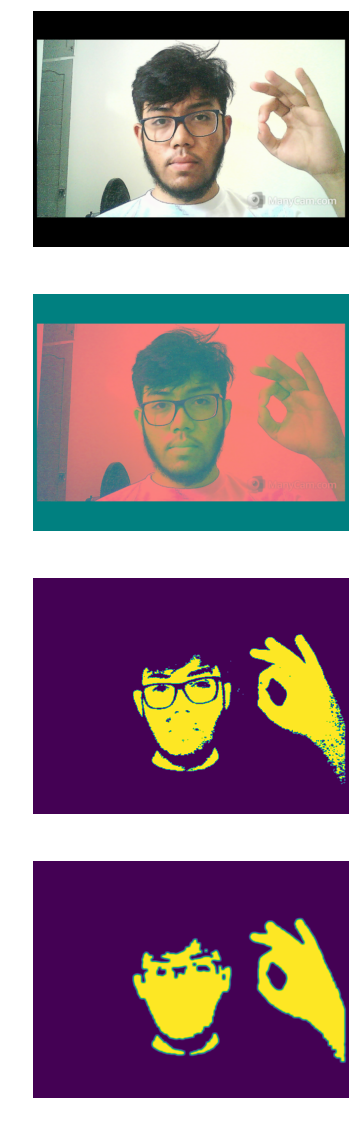

In [34]:
test("ok.png")

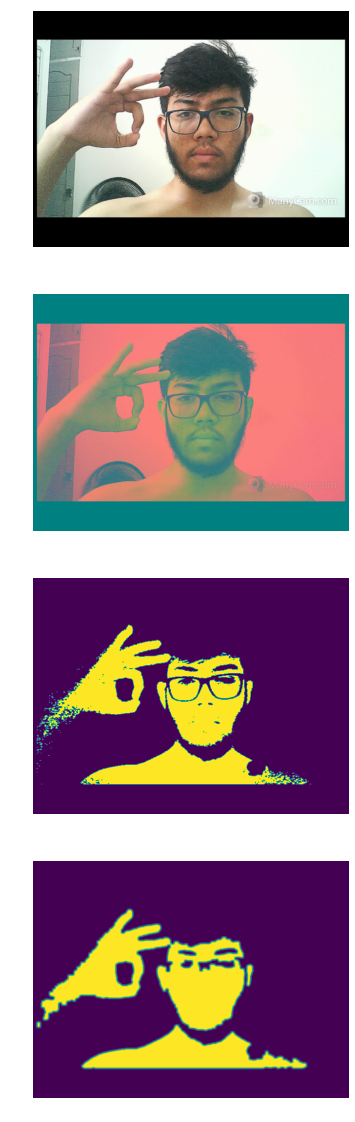

In [35]:
test("ok2.png")

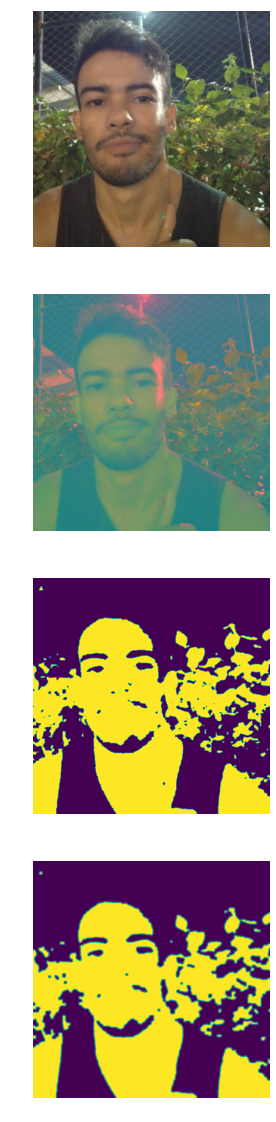

In [36]:
test("anderson.jpg")

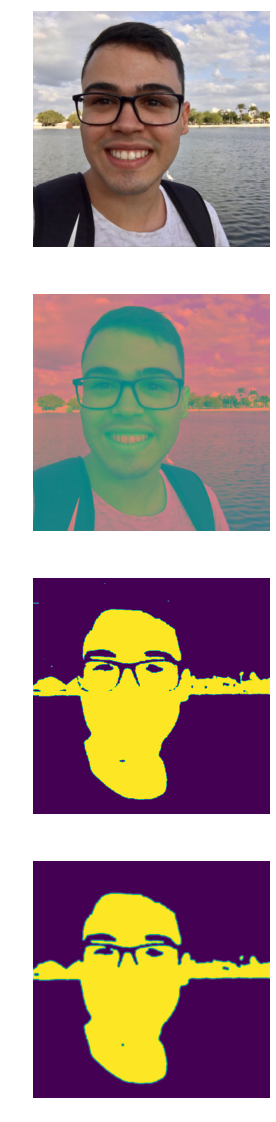

In [37]:
test('gustavo.jpg')

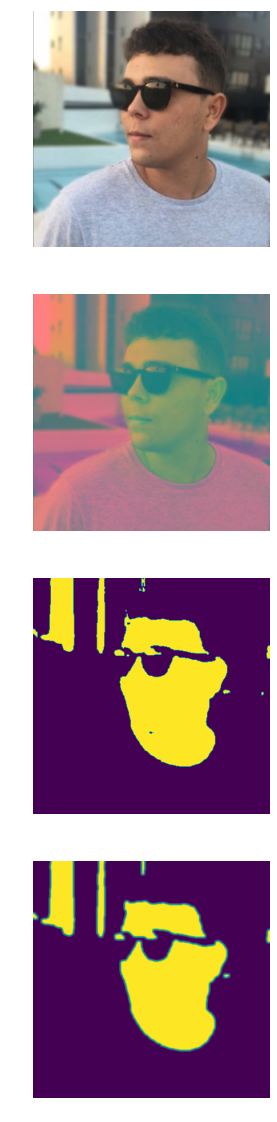

In [38]:
test("thiago.jpg")

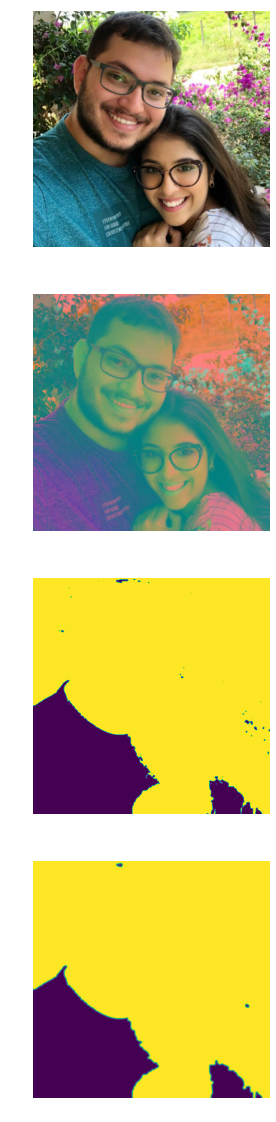

In [39]:
test("marcos.jpg")

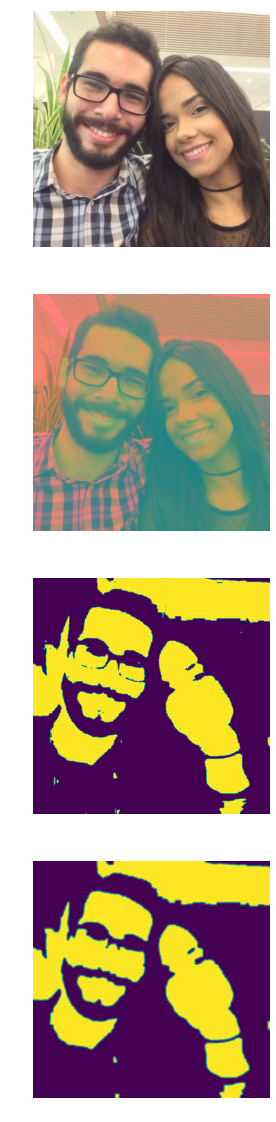

In [40]:
test("matheus.jpg")